In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# JANGAN RUN KODE INI ! KECUALI ANDA MENGGUNAKAN GPU

# Membatasi alokasi memori GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Hanya mengalokasikan memori yang diperlukan
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)  

In [3]:
data = pd.read_csv('final_balance_dataset.csv')
data.head(4)

Timestamp              Email Address  \
0  11/11/2024 20:01:37  igustisuryaadwn@gmail.com   
1  11/11/2024 20:02:31     fredyaryanta@gmail.com   
2  11/11/2024 20:07:00   pandddeputra12@gmail.com   
3  11/11/2024 20:08:41        adihazel8@gmail.com   

                              Nama  Usia (Contoh: 18) Jenis Kelamin  \
0  I Gusti Agung Surya Adhiwinata                  19     Laki-Laki   
1           I Nyoman Fredy Aryanta                 48     Laki-Laki   
2         I Putu Pande Surya Putra                 19     Laki-Laki   
3          I Made Adi Hazel Nagata                 16     Laki-Laki   

  Status Pekerjaan  \
0          Pelajar   
1          Bekerja   
2          Pelajar   
3          Pelajar   

  Saya menyatakan bersedia secara sukarela untuk berpartisipasi pada penelitian ini dengan mengisi kuesioner selama kurang lebih 20-30 menit tanpa paksaan dari pihak manapun. Saya sepenuhnya memahami apa yang telah disampaikan serta apa yang diharapkan dari saya selaku partisipan penelitian. Saya berhak untuk berhenti mengisi kuesioner ini kapan saja tanpa perlu memberikan penjelasan. Saya memberikan izin untuk menggunakan data yang saya berikan hanya untuk kepentingan penelitian ini. Saya telah memahami bahwa informasi yang diperoleh dari penelitian ini sepenuhnya rahasia dan hanya digunakan untuk kepentingan ilmiah  \
0                                  Ya, Saya bersedia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1                                  Ya, Saya bersedia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2                                  Ya, Saya bersedia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
3                                  Ya, Saya bersedia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

   Menjadi marah karena hal-hal kecil/sepele  Mulut terasa kering  \
0                                          2                    2   
1

In [4]:
data.shape

(736, 48)

In [5]:
# delete useless column
data.drop(data.iloc[:,:3],axis=1,inplace=True)
data.drop(data.iloc[:,3:4],axis=1,inplace=True)
data.drop(data.columns[-1],axis=1,inplace=True)
data.head(3)

Usia (Contoh: 18) Jenis Kelamin Status Pekerjaan  \
0                 19     Laki-Laki          Pelajar   
1                 48     Laki-Laki          Bekerja   
2                 19     Laki-Laki          Pelajar   

   Menjadi marah karena hal-hal kecil/sepele  Mulut terasa kering  \
0                                          2                    2   
1                                          2                    2   
2                                          1                    2   

   Tidak dapat melihat hal yang positif dari suatu\nkejadian  \
0                                                  0           
1                                                  0           
2                                                  0           

   Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)  \
0                                                  0                  
1                                                  0                  
2                                                  0                  

   Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan  \
0                                                  1                   
1                                                  0                   
2                                                  1                   

   Cenderung bereaksi berlebihan pada situasi  Kelemahan pada anggota tubuh  \
0                                           1                             0   
1                                           1                             1   
2                                           2                             0   

   ...  Berada pada keadaan tegang  Merasa tidak berharga  \
0  ...                           1                      1   
1  ...                           0                      0   
2  ...                           2                      0   

   Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan  \
0                                                  0                                                           
1                                                  0                                                           
2                                                  0                                                           

   Merasa ketakutan  Merasa tidak ada harapan untuk masa depan  \
0                 1                                          0   
1                 0                                          0   
2                 0                                          0   

   Merasa hidup tidak berarti  Mudah gelisah  \
0                           0              1   
1                           0              0   
2                           0              0   

   Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri  \
0                                                  0                                              
1                                                  0                                              
2                                                  1                                              

   Gemetar  Sulit untuk meningkatkan inisiatif dalam melakukan\nsesuatu  
0        1                                                  1            
1        0                                                  0            
2        0                                                  2            

[3 rows x 43 columns]

In [6]:
# DISPLAY LABEL IN CATEGORICAL COLUMNS
data['Jenis Kelamin'].unique()  ,  data['Status Pekerjaan'].unique()

(array(['Laki-Laki', 'Perempuan', 'perempuan', 'laki-laki'], dtype=object),
 array(['Pelajar', 'Bekerja', 'bekerja', 'pelajar'], dtype=object))

In [7]:
#LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# REPLACE LABEL JENIS KELAMIN
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace(to_replace='laki-laki', value='Laki-Laki')
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace(to_replace='perempuan', value='Perempuan')

# REPLACE LABEL STATUS PEKERJAAN
data['Status Pekerjaan'] = data['Status Pekerjaan'].replace(to_replace = 'bekerja',value= 'Bekerja')
data['Status Pekerjaan'] = data['Status Pekerjaan'].replace(to_replace = 'pelajar',value= 'Pelajar')

data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Pekerjaan'] = label_encoder.fit_transform(data['Status Pekerjaan'])

data.head(4)

Usia (Contoh: 18)  Jenis Kelamin  Status Pekerjaan  \
0                 19              0                 1   
1                 48              0                 0   
2                 19              0                 1   
3                 16              0                 1   

   Menjadi marah karena hal-hal kecil/sepele  Mulut terasa kering  \
0                                          2                    2   
1                                          2                    2   
2                                          1                    2   
3                                          1                    1   

   Tidak dapat melihat hal yang positif dari suatu\nkejadian  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  1           

   Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  

   Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan  \
0                                                  1                   
1                                                  0                   
2                                                  1                   
3                                                  1                   

   Cenderung bereaksi berlebihan pada situasi  Kelemahan pada anggota tubuh  \
0                                           1                             0   
1                                           1                             1   
2                                           2                             0   
3                                           1                             1   

   ...  Berada pada keadaan tegang  Merasa tidak berharga  \
0  ...                           1                      1   
1  ...                           0                      0   
2  ...                           2                      0   
3  ...                           0                      0   

   Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan  \
0                                                  0                                                           
1                                                  0                                                           
2                                                  0                                                           
3                                                  2                                                           

   Merasa ketakutan  Merasa tidak ada harapan untuk masa depan  \
0                 1                                          0   
1                 0                                          0   
2                 0                                          0   
3                 0                                          0   

   Merasa hidup tidak berarti  Mudah gelisah  \
0                           0              1   
1                           0              0   
2                           0              0   
3                           0              0   

   Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri  \
0                                                  0                                              
1                                                  0                                              
2                                                  1                                              
3                                                  0                                              

  

In [8]:
# AFTER ENCODED
data['Jenis Kelamin'].unique()   ,   data['Status Pekerjaan'].unique()

(array([0, 1]), array([1, 0]))

In [9]:
# NORMALIZATION

#MENGUBAH NAMA KOLOM USIA
data = data.rename(mapper = {'Usia (Contoh: 18)':'Usia'},axis=1)

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

data['Usia'] = minmax.fit_transform(data[['Usia']])
data.head(4)

Usia  Jenis Kelamin  Status Pekerjaan  \
0  0.204545              0                 1   
1  0.863636              0                 0   
2  0.204545              0                 1   
3  0.136364              0                 1   

   Menjadi marah karena hal-hal kecil/sepele  Mulut terasa kering  \
0                                          2                    2   
1                                          2                    2   
2                                          1                    2   
3                                          1                    1   

   Tidak dapat melihat hal yang positif dari suatu\nkejadian  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  1           

   Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  

   Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan  \
0                                                  1                   
1                                                  0                   
2                                                  1                   
3                                                  1                   

   Cenderung bereaksi berlebihan pada situasi  Kelemahan pada anggota tubuh  \
0                                           1                             0   
1                                           1                             1   
2                                           2                             0   
3                                           1                             1   

   ...  Berada pada keadaan tegang  Merasa tidak berharga  \
0  ...                           1                      1   
1  ...                           0                      0   
2  ...                           2                      0   
3  ...                           0                      0   

   Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan  \
0                                                  0                                                           
1                                                  0                                                           
2                                                  0                                                           
3                                                  2                                                           

   Merasa ketakutan  Merasa tidak ada harapan untuk masa depan  \
0                 1                                          0   
1                 0                                          0   
2                 0                                          0   
3                 0                                          0   

   Merasa hidup tidak berarti  Mudah gelisah  \
0                           0              1   
1                           0              0   
2                           0              0   
3                           0              0   

   Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri  \
0                                                  0                                              
1                                                  0                                              
2                                                  1                                              
3                                                  0                                              

   Gemetar  Sulit untuk meningkatkan inisiatif dala

In [10]:
# CREATE DATAFRAME FROM EACH OUTPUT

depresi_cols = [0, 1, 2, 5, 7, 12, 15, 18, 19, 23, 26, 28, 32, 33, 34, 36, 39]
kecemasan_cols = [0, 1, 2, 4, 6, 9, 11, 17, 21, 22, 25, 27, 29, 32, 33, 38, 39]
stres_cols = [0, 1, 2, 3, 8, 10, 13, 14, 16, 20, 24, 29, 31, 34, 35, 37, 39]

# CREATE NEW DATAFRAME FOR DEPRESI OUTPUT
data_depresi = data.iloc[:,depresi_cols]  # DEEP COPY column yg termasuk depresi
data_depresi.loc[:,'skor_depresi'] = 0    # BUAT KOLOM BARU DAN INISIALISASI DGN NILAI 0
data_depresi.loc[:,'skor_depresi'] = data_depresi.sum(axis=1).astype(dtype=int) #FILL skor_depresi from sum of every sample

data_kecemasan = data.iloc[:,kecemasan_cols]
data_kecemasan.loc[:,'skor_kecemasan'] = 0
data_kecemasan.loc[:,'skor_kecemasan'] = data_kecemasan.sum(axis=1).astype(dtype=int)

data_stress = data.iloc[:,stres_cols]
data_stress.loc[:,'skor_stress'] = 0
data_stress.loc[:,'skor_stress'] = data_stress.sum(axis=1).astype(dtype=int)

# CREATE A LABEL

def categorize(skor, thresholds):
        for i, threshold in enumerate(thresholds):
            if skor <= threshold:
                return i
        return len(thresholds)

depresi_thresholds = [9, 13, 20, 27]
kecemasan_thresholds = [7, 12, 18, 26]
stres_thresholds = [14, 18, 24, 29]

data_depresi['kategori_depresi'] = data_depresi['skor_depresi'].apply(lambda x: categorize(x, depresi_thresholds))
data_kecemasan['kategori_kecemasan'] = data_kecemasan['skor_kecemasan'].apply(lambda x: categorize(x, kecemasan_thresholds))
data_stress['kategori_stress'] = data_stress['skor_stress'].apply(lambda x: categorize(x, stres_thresholds))

data_depresi.describe()

C:\Users\aliff\AppData\Local\Temp\ipykernel_28740\1669895041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depresi.loc[:,'skor_depresi'] = 0    # BUAT KOLOM BARU DAN INISIALISASI DGN NILAI 0
C:\Users\aliff\AppData\Local\Temp\ipykernel_28740\1669895041.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kecemasan.loc[:,'skor_kecemasan'] = 0
C:\Users\aliff\AppData\Local\Temp\ipykernel_28740\1669895041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Usia  Jenis Kelamin  Status Pekerjaan  \
count  736.000000     736.000000        736.000000   
mean     0.382998       0.467391          0.510870   
std      0.226673       0.499275          0.500222   
min      0.000000       0.000000          0.000000   
25%      0.204545       0.000000          0.000000   
50%      0.363636       0.000000          1.000000   
75%      0.568182       1.000000          1.000000   
max      1.000000       1.000000          1.000000   

       Tidak dapat melihat hal yang positif dari suatu\nkejadian  \
count                                         736.000000           
mean                                            1.369565           
std                                             1.113601           
min                                             0.000000           
25%                                             0.000000           
50%                                             1.000000           
75%                                             2.000000           
max                                             3.000000           

       Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan  \
count                                         736.000000                   
mean                                            1.389946                   
std                                             1.104774                   
min                                             0.000000                   
25%                                             0.000000                   
50%                                             1.000000                   
75%                                             2.000000                   
max                                             3.000000                   

       Merasa psimis dalam segala hal  Merasa sedih dan depresi  \
count                      736.000000                736.000000   
mean                         1.423913                  1.383152   
std                          1.117419                  1.106537   
min                          0.000000                  0.000000   
25%                          0.000000                  0.000000   
50%                          1.000000                  1.000000   
75%                          2.000000                  2.000000   
max                          3.000000                  3.000000   

       Kehilangan minat pada banyak hal (misal: makan,\nambulasi, sosialisasi)  \
count                                         736.000000                         
mean                                            1.380435                         
std                                             1.112378                         
min                                             0.000000                         
25%                                             0.000000                         
50%                                             1.000000                         
75%                                             2.000000                         
max                                             3.000000                         

       Merasa diri tidak layak  Merasa hidup tidak berharga  \
count               736.000000                   736.000000   
mean                  1.425272                     1.335598   
std                   1.111407                     1.110315   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   1.000000                     1.000000   
75%                   2.000000                     2.000000   
max                   3.000000                     3.000000   

       Tidak dapat menikmati hal-hal yang saya lakukan  Mudah marah  \
count                                       736.000000   736.000000   
mean                                          1.389946     1.404891   
std                                           1.126723     1.067352   
min                              

In [11]:
# SPLIT DATASET

from sklearn.model_selection import train_test_split

#SPLIT DATASET FOR DEPRESI 
x_depresi = data_depresi.drop(columns=['skor_depresi','kategori_depresi'])
y_depresi = data_depresi['kategori_depresi']
x_train_depresi , x_test_depresi , y_train_depresi , y_test_depresi = train_test_split(x_depresi, y_depresi,test_size=0.2, random_state=12,shuffle=True)


# SPLIT DATASET FOR KECEMASAN
x_kecemasan = data_kecemasan.drop(columns=['skor_kecemasan','kategori_kecemasan'])
y_kecemasan = data_kecemasan['kategori_kecemasan']
x_train_kecemasan , x_test_kecemasan , y_train_kecemasan , y_test_kecemasan = train_test_split(x_kecemasan, y_kecemasan,test_size=0.2, random_state=12, shuffle=True)

# SPLIT DATASET FOR STRESS
x_stress = data_stress.drop(columns=['skor_stress','kategori_stress'])
y_stress = data_stress['kategori_stress']
x_train_stress , x_test_stress , y_train_stress , y_test_stress = train_test_split(x_stress, y_stress, test_size=0.2 , random_state=12, shuffle=True)


x_train_depresi.shape   , type(x_train_kecemasan)  , y_train_stress.shape  , type(y_test_depresi)

((588, 17), pandas.core.frame.DataFrame, (588,), pandas.core.series.Series)

In [12]:
# CHECK CLASS IMBALANCE FOR DEPRESI DATASET

label_normal = (y_depresi == 0).sum()
label_ringan = (y_depresi == 1).sum()
label_sedang = (y_depresi == 2).sum()
label_parah = (y_depresi == 3).sum()
label_sangatparah = (y_depresi == 4).sum()

label_normal , label_ringan , label_sedang , label_parah , label_sangatparah

(88, 50, 224, 263, 111)

In [13]:
# CHECK CLASS IMBALANCE FOR KECEMASAN DATASET
label_normal = (y_kecemasan == 0).sum()
label_ringan = (y_kecemasan == 1).sum()
label_sedang = (y_kecemasan == 2).sum()
label_parah = (y_kecemasan == 3).sum()
label_sangatparah = (y_kecemasan == 4).sum()

label_normal , label_ringan , label_sedang , label_parah , label_sangatparah

(45, 83, 143, 332, 133)

In [14]:
# CHECK CLASS IMBALANCE FOR STRESS DATASET 
label_normal = (y_stress == 0).sum()
label_ringan = (y_stress == 1).sum()
label_sedang = (y_stress == 2).sum()
label_parah = (y_stress == 3).sum()
label_sangatparah = (y_stress == 4).sum()

label_normal , label_ringan , label_sedang , label_parah , label_sangatparah

(142, 123, 263, 117, 91)

In [15]:
# CREATE ARCHITECTURE 

model_depresi = tf.keras.Sequential(layers=[
    tf.keras.layers.Input(shape=(x_depresi.shape[1],)),
    
    tf.keras.layers.Dense(units=65 , activation='selu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=120, activation='selu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),

    tf.keras.layers.Dense(units=120, activation='selu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2 = 0.02)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),

    tf.keras.layers.Dense(units=40, activation='selu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.02)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Dense(units=5, activation='softmax')
]
)
model_depresi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                1170      
                                                                 
 batch_normalization (BatchN  (None, 65)               260       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_1 (Dense)             (None, 120)               7920      
                                                                 
 batch_normalization_1 (Batc  (None, 120)              480       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 120)               0

In [16]:
model_depresi.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model_depresi.fit(
    x = x_train_depresi,
    y = y_train_depresi,
    batch_size = 20,
    epochs = 200,
    verbose = 1,
    validation_data=(x_test_depresi, y_test_depresi)
)

Epoch 1/200
30/30 [==============================] - 3s 20ms/step - loss: 29.2258 - accuracy: 0.3044 - val_loss: 27.4274 - val_accuracy: 0.2500
Epoch 2/200
30/30 [==============================] - 0s 11ms/step - loss: 24.8888 - accuracy: 0.3997 - val_loss: 23.1968 - val_accuracy: 0.2500
Epoch 3/200
30/30 [==============================] - 0s 11ms/step - loss: 20.9962 - accuracy: 0.4507 - val_loss: 19.2751 - val_accuracy: 0.4324
Epoch 4/200
30/30 [==============================] - 0s 11ms/step - loss: 17.5258 - accuracy: 0.5000 - val_loss: 15.9772 - val_accuracy: 0.4662
Epoch 5/200
30/30 [==============================] - 0s 11ms/step - loss: 14.4263 - accuracy: 0.5646 - val_loss: 13.0276 - val_accuracy: 0.5135
Epoch 6/200
30/30 [==============================] - 0s 12ms/step - loss: 11.7838 - accuracy: 0.5595 - val_loss: 10.5621 - val_accuracy: 0.5135
Epoch 7/200
30/30 [==============================] - 0s 11ms/step - loss: 9.5305 - accuracy: 0.5952 - val_loss: 8.5938 - val_accuracy: 0

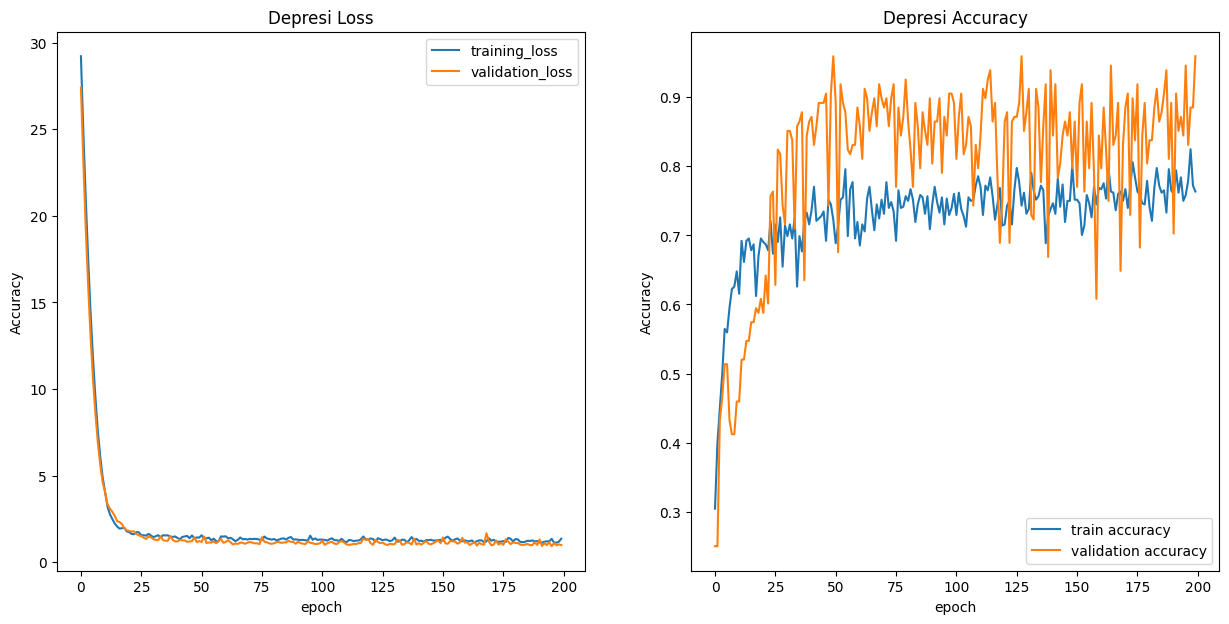

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epoch = range(len(loss))

fig , axes = plt.subplots(nrows=1 , ncols=2 ,figsize=(15,7))

axes[0].plot(epoch, loss, label='training_loss')
axes[0].plot(epoch, val_loss, label='validation_loss')
axes[0].set_title('Depresi Loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epoch,accuracy,label='train accuracy')
axes[1].plot(epoch,val_accuracy,label='validation accuracy')
axes[1].set_title('Depresi Accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

In [19]:
# EVALUATION
y_pred = model_depresi.predict(x_test_depresi)
y_pred = np.argmax(a=y_pred,axis=1)

type(y_pred) , type(y_test_depresi) , y_pred , y_test_depresi

5/5 [==============================] - 0s 7ms/step


(numpy.ndarray,
 pandas.core.series.Series,
 array([2, 4, 2, 0, 0, 1, 4, 3, 2, 4, 3, 0, 3, 4, 4, 3, 0, 2, 3, 4, 0, 3,
        3, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4, 2, 4, 3, 3, 2,
        4, 3, 4, 1, 2, 3, 0, 0, 3, 2, 4, 1, 2, 0, 3, 3, 1, 2, 3, 3, 3, 2,
        0, 2, 0, 4, 3, 0, 2, 4, 3, 2, 3, 3, 3, 2, 3, 0, 2, 4, 0, 2, 3, 2,
        2, 2, 4, 3, 0, 2, 3, 3, 3, 3, 2, 3, 4, 2, 2, 2, 2, 0, 4, 0, 2, 4,
        3, 2, 2, 0, 4, 3, 4, 4, 4, 4, 0, 3, 3, 0, 2, 4, 3, 2, 0, 3, 4, 4,
        3, 4, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 0, 3, 4], dtype=int64),
 344    2
 129    4
 56     1
 602    1
 270    0
       ..
 235    3
 733    4
 9      0
 61     3
 705    4
 Name: kategori_depresi, Length: 148, dtype: int64)

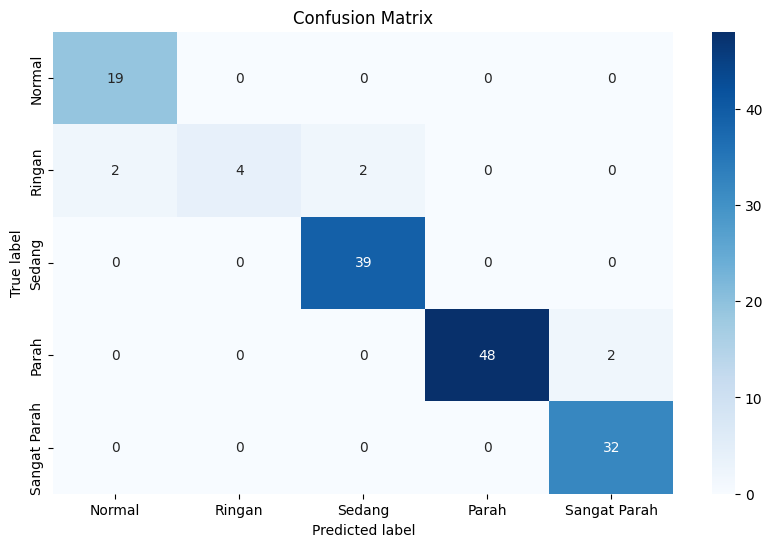

In [20]:
cm_depresi = confusion_matrix(y_test_depresi, y_pred)

plt.figure(figsize=(10,6))
labels= ['Normal','Ringan','Sedang','Parah','Sangat Parah']
sns.heatmap(data=cm_depresi, annot=True, cmap='Blues', fmt='.2g', xticklabels=labels, yticklabels=labels)
# Show the plot
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [21]:
accuracy_depresi = np.trace(cm_depresi) / np.sum(cm_depresi)
accuracy_depresi

0.9594594594594594

In [23]:
model_depresi.save('model_depresi_newdataset.h5')